## Introduction

In this mini project, you will explore and analyze the Business Sales dataset. The dataset shows the sales of a company in different shops. Each row shows how many items of a specific product were sold on some date in some shop. The focus is on number of products sold and revenues.

The guideline is only there to give you some ideas. You don't have to follow or complete all of them. The important thing is to create a coherent analysis with meaningful comments. However, we expect that you are able to do the first 4 sections. Section 5 and 6 have more advanced questions and you may choose to do them according to your current level.

Data fields

    date - date in format yyyy-mm-dd
    date_block_num - a consecutive month number, used for convenience. January 2013 is 0, February 2013 is 1,..., October 2015 is 33
    shop_id - unique identifier of a shop
    shop_name - name of shop
    item_id - unique identifier of a product
    item_price - current price of the item (in Russian RUB)
    item_cnt_day - number of products sold on that date in that shop
    item_name - name of item
    item_category_id - unique identifier of item category
    item_category_name - name of item category


Shop name: The first word in shop_name is the name of a city in Russia

Item category name: Contains the general category and sub category, separated by -

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [58]:
sales = pd.read_csv('sales_eng.csv')

1- Initial inspection


2- Data cleaning:
    - Convert the date column to Datetime object (optional: you can choose to set it as index)
    - Inspect and handle missing values
    - Correct/remove outliers (too high item_price/item_cnt_day, negative values)


3- Create new information (only do the ones you think is needed for your analysis):
    - Revenues (items sold * item price)
    - City name
    - Product general category


4- Explore the data from different angles:
    - Plot the total amount of items sold by day. Which time of the year company makes more sales?
    - Plot the total amount sold by day of the week. Were more sales being made during the weekends?
    - Plot the top (20-30) shops by amount sold (or revenues). Which cities are they usually located?
    - Plot the top products by amount sold (or revenues). Plot the top general categories / sub-categories.
    - Bin the item_price into categories (range of your choice) and plot them.
    

5- If you want more brain burner challenges, try focusing on items through these in-depth questions
    - Which were the best selling item for each month by amounts sold / revenue?
    - How many items haven't made a sale in the last 6 months?
    - A manager wants to know which items have been selling consistently well. She defines that an item has a good  month if it accumulates more than 100000 RUB in revenues. Show 10 items that have the most good months and their average monthly revenues.
    - Sometimes an item is sold at a higher or lower than its usual price. A manager wants to know if they make more sales (in total and on average) when they increase or decrease the product price. An item is deemed overpriced (underpriced) when it's sold at 10% higher (lower) than the item's average price, otherwise it's priced normally. 
    

6- Alternatively, you can focus on the shop
    - Plot the daily revenues of the top 5 shops (in terms of total revenues).
    - Show the top 10 shops that sell the widest range of products (hint: nunique). Plot a double bar chart showing the number of unique product and total revenues (hint: use .agg()).
    - What is the correlation between yesterday revenues and today revenues? For easy version, do it on the global  scale. For a very hard version, group the data by shop and then by date (sum revenues), then create a column     that shows the previous day's revenue.

In [59]:
sales.date = pd.to_datetime(sales.date, format = '%Y/%m/%d', errors = 'coerce')

In [60]:
sales = sales.set_index('date').sort_index()

In [61]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1382256 entries, 2013-01-01 to NaT
Data columns (total 9 columns):
date_block_num        1381893 non-null float64
shop_id               1381893 non-null float64
shop_name             1381893 non-null object
item_id               1382256 non-null int64
item_name             1382256 non-null object
item_price            1381835 non-null float64
item_cnt_day          1381893 non-null float64
item_category_id      1381887 non-null float64
item_category_name    1381887 non-null object
dtypes: float64(5), int64(1), object(3)
memory usage: 89.6+ MB


In [62]:
sales.item_price = np.where((sales.item_price > 50000), sales.item_price/100, sales.item_price)

In [63]:
sales.item_price = np.where((sales.item_price < 0), sales.item_price == np.nan, sales.item_price)

In [64]:
sales.item_cnt_day = np.where((sales.item_cnt_day < 0), sales.item_cnt_day == np.nan, sales.item_cnt_day)

In [65]:
sales.describe()

,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_category_id
count,1.381893e+06,1.381893e+06,1.382256e+06,1.381835e+06,1.381893e+06,1.381887e+06
mean,1.417271e+01,2.091522e+01,9.547165e+03,8.999756e+02,1.207076e+00,3.475014e+01
std,9.383326e+00,8.982203e+00,6.136746e+03,1.806139e+03,2.732847e+00,1.282271e+01
min,0.000000e+00,0.000000e+00,1.800000e+01,0.000000e+00,0.000000e+00,0.000000e+00
25%,6.000000e+00,1.500000e+01,4.245000e+03,2.490000e+02,1.000000e+00,2.500000e+01
50%,1.300000e+01,2.500000e+01,7.901000e+03,3.990000e+02,1.000000e+00,3.700000e+01
75%,2.200000e+01,2.800000e+01,1.442900e+04,9.490000e+02,1.000000e+00,4.000000e+01
max,3.300000e+01,5.900000e+01,2.216700e+04,4.299000e+04,2.169000e+03,7.900000e+01


In [66]:
sales = sales.dropna(thresh = 6)

In [67]:
sales = sales.dropna(subset = ['item_price'])

In [68]:
sales.info()  #Rows where item_category_id and item_category_name are NaN can stay, because they are not relevant for 
              #calculations, however, the other values in their rows are.

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1381835 entries, 2013-01-01 to 2015-10-31
Data columns (total 9 columns):
date_block_num        1381835 non-null float64
shop_id               1381835 non-null float64
shop_name             1381835 non-null object
item_id               1381835 non-null int64
item_name             1381835 non-null object
item_price            1381835 non-null float64
item_cnt_day          1381835 non-null float64
item_category_id      1381466 non-null float64
item_category_name    1381466 non-null object
dtypes: float64(5), int64(1), object(3)
memory usage: 89.6+ MB


In [69]:
sales['shop_name'] = sales['shop_name'].str.strip()

In [70]:
sales['revenues'] = sales.item_cnt_day * sales.item_price

In [71]:
#sales['city'] = sales['shop_name'].str.split(" ", n=1, expand=True)

In [72]:
sales['city'] = sales.shop_name.str.split(" ").str[0]

In [73]:
sales.item_category_name.unique()

array(['Music - CD of local production', 'PC Games - Standard Edition',
       'Games - PSVita', 'Accessories - PS3', 'Books - Audiobooks',
       'Accessories - PSVita', 'Accessories - XBOX 360',
       'PC Games - Additional Edition', "PC Games - Collector's Edition",
       'Books - Methodical materials 1С', 'Music - MP3', 'Games - PS3',
       'Cinema - DVD', 'Game Consoles - PS3', 'Payment cards - PSN',
       'Games - Accessories for games', 'Accessories - PSP',
       'Games - PSP', 'Cinema - Blu-Ray 3D', 'Cinema - Blu-Ray',
       "Cinema - Collector's", 'Accessories - PS4', 'Games - XBOX 360',
       'Music - Musical video', 'Game Consoles - PSP',
       'Payment cards - Live!', 'Books - Audiobooks 1C',
       'Game Consoles - XBOX 360', 'Music - CD of branded production',
       'Game Consoles - PSVita', 'Music - Vinyl', nan, 'Games - PS2',
       'Delivery of goods', 'PC - Headsets / Headphones',
       'Books - Business Literature', 'Books - Computer Literature',
       'Ga

In [91]:
sales['general_category'] = sales.item_category_name.str.split("-").str[0]

In [92]:
sales.general_category = sales.general_category.fillna('Not Defined')

In [98]:
sales.general_category = np.where((sales.general_category == 'PC '), sales.general_category.replace('PC ', 'PC Accessories'), sales.general_category)

In [103]:
sales.general_category = np.where((sales.general_category == 'Payment cards (Movies, Music, Games)'), sales.general_category.replace('Payment cards (Movies, Music, Games)', 'Payment cards'), sales.general_category)

In [110]:
sales.general_category = np.where((sales.general_category == 'Games'), sales.general_category.replace('Games', 'Console Games & Accessories'), sales.general_category)

In [101]:
sales.general_category = sales.general_category.str.strip()

In [111]:
sales.general_category.unique()

array(['Music', 'PC Games', 'Console Games & Accessories', 'Accessories',
       'Books', 'Cinema', 'Game Consoles', 'Payment cards', 'Not Defined',
       'Delivery of goods', 'PC Accessories', 'Книги', 'Tickets (figure)'],
      dtype=object)

In [113]:
sales

,date_block_num,shop_id,shop_name,item_id,item_name,item_price,item_cnt_day,item_category_id,item_category_name,revenues,city,general_category
date,,,,,,,,,,,,
2013-01-01,0.0,18.0,"Krasnoyarsk Shopping center ""June""",2589,DEPECHE MODE Exciter,279.0,1.0,55.0,Music - CD of local production,279.0,Krasnoyarsk,Music
2013-01-01,0.0,18.0,"Krasnoyarsk Shopping center ""June""",14231,"Best games. Tron: Evolution [PC, Jewel, Russia...",149.0,1.0,30.0,PC Games - Standard Edition,149.0,Krasnoyarsk,PC Games
2013-01-01,0.0,18.0,"Krasnoyarsk Shopping center ""June""",10242,"Viking: The Battle of Asgard [PC, Jewel, Russi...",249.0,1.0,30.0,PC Games - Standard Edition,249.0,Krasnoyarsk,PC Games
2013-01-01,0.0,14.0,"Kazan Shopping center ""ParkHaus"" II",2304,"Call of Duty: Black Ops Declassified [PS Vita,...",1999.0,2.0,22.0,Games - PSVita,3998.0,Kazan,Console Games & Accessories
2013-01-01,0.0,2.0,"Adygea Shopping center ""Mega""",5649,PS3: Файтстик Hori Mini 3,2190.0,1.0,2.0,Accessories - PS3,2190.0,Adygea,Accessories
...,...,...,...,...,...,...,...,...,...,...,...,...
2015-10-31,33.0,31.0,"Moscow Shopping center ""Семеновский""",18622,THE CROODS,169.0,1.0,40.0,Cinema - DVD,169.0,Moscow,Cinema
2015-10-31,33.0,7.0,"Voronezh Shopping center ""Maksimir""",2576,DEL REY LANA Honeymoon,349.0,1.0,55.0,Music - CD of local production,349.0,Voronezh,Music
2015-10-31,33.0,7.0,"Voronezh Shopping center ""Maksimir""",17011,PICNIC Big game 3CD (company),599.0,1.0,55.0,Music - CD of local production,599.0,Voronezh,Music


In [18]:
#sales = sales.sort_values(['item_id', 'item_category_id'])
#sales['item_category_id'] = sales.groupby('item_id').item_category_id.transform('first')

# Plotting Starts

In [20]:
sold_per_day = sales.groupby('date').sum()

In [21]:
sold_per_day.item_cnt_day

date
2013-01-01     893.0
2013-01-02    4141.0
2013-01-03    3615.0
2013-01-04    3200.0
2013-01-05    3015.0
               ...  
2015-10-27     636.0
2015-10-28    2795.0
2015-10-29     723.0
2015-10-30    1110.0
2015-10-31    1242.0
Name: item_cnt_day, Length: 1034, dtype: float64

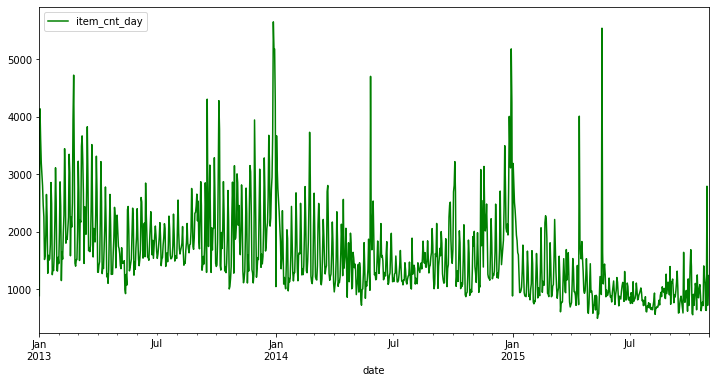

In [22]:
sold_per_day[['item_cnt_day']].sort_index().plot(kind='line', color = 'green', figsize=(12,6))

In [23]:
#This chart shows the total number of items sold per day. It would appear, that the company has usually sold the most amount
#of products around December and January every year. We can also see a visible increase of sales at the beginning of each
#summer, around June and July too. There are a few spikes of increased sales at different parts of the year in certain years
#as well, which can probably be credited to an exceptionally successful product's release. Generally speaking, it seems that
#sales are sky-high during holiday times, such as Christmas, New Year and the beginning of summer.

In [24]:
sales['day_of_week'] = sales.index.day_name()

In [25]:
days = sales.groupby('day_of_week').sum()

In [26]:
days = days.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

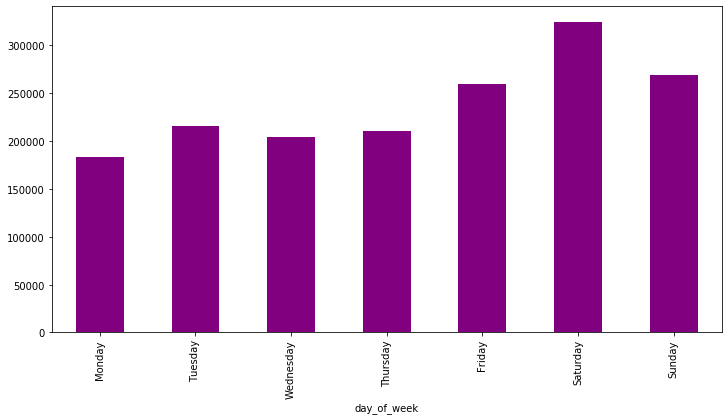

In [27]:
days.item_cnt_day.plot(kind = 'bar', color = 'purple', figsize=(12,6))

In [28]:
#From this chart, we can see which days of the week had how big amount of sales throughout the years. It can easily be seen,
#that the highest amount of sales happened during weekend times, Saturday especially, followed by Sunday and Friday. We can
#assume that people buy more products when they have off-days coming up.

In [29]:
gb = sales.groupby('city').sum()

In [30]:
gb.revenues = np.where((gb.revenues > 800000000), gb.revenues/5, gb.revenues)

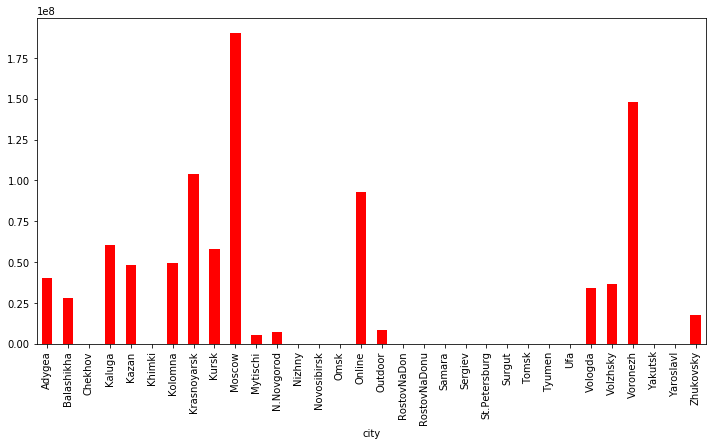

In [31]:
gb.revenues.plot(kind='bar', color = 'red', figsize=(12,6))

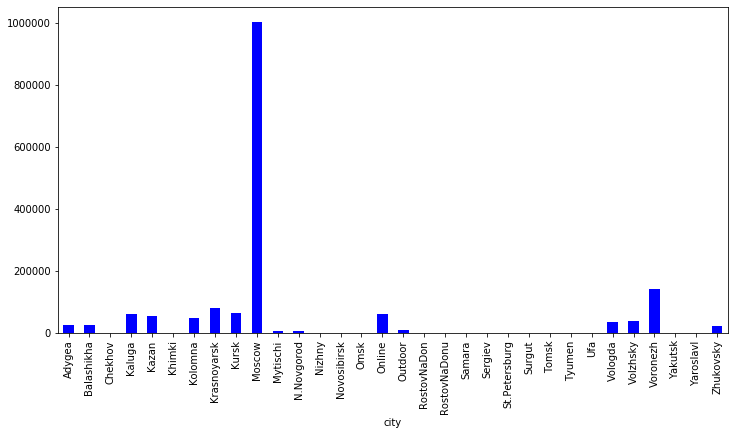

In [32]:
gb.item_cnt_day.plot(kind='bar', color='blue', figsize=(12,6))

In [33]:
#From these two charts, we can clearly see that sales and revenue are out the roof and shooting towards space like Sputnik,
#in Moscow, compared to any other cities that are listed in our data. For the sake of easier visualization, I have divided
#the total amount of revenue in Moscow by 5, and it's still so much, that the values of half of the cities don't even
#show up. Likewise if we look at the data from the side of items sold by day, Moscow is also way out there. In conclusion,
#business seems to be going the best in the Russian capitol.

In [34]:
gb1_5 = sales.groupby('shop_name').sum()

In [35]:
gb1_5 = gb1_5.sort_values('item_cnt_day', ascending = False)

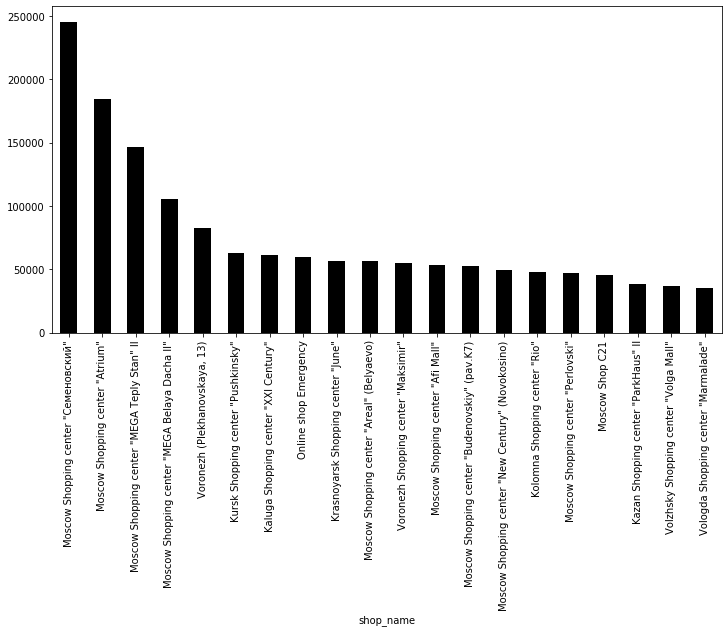

In [36]:
gb1_5.item_cnt_day.head(20).plot(kind = 'bar', color = 'black', figsize=(12,6))

In [37]:
#Here we can see the top 20 shops according to number of items sold per day. Just by looking at the names of the shops
#we can determine that the most successful shops are located in Moscow, and that generally, the city shopping centres 
#are the places where the most sales happen. 

In [38]:
gb2 = sales.groupby('item_name').sum()

In [39]:
gb2 = gb2.sort_values('revenues', ascending = False)

In [40]:
gb2.revenues = np.where((gb2.revenues > 120000000), gb2.revenues/4, gb2.revenues)

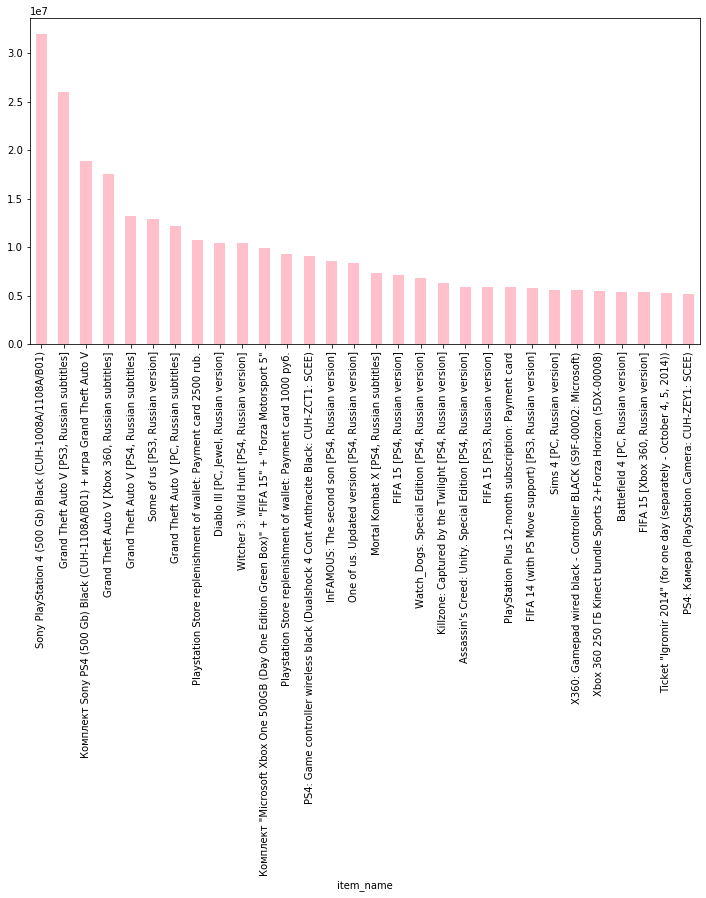

In [41]:
gb2.revenues.head(30).plot(kind = 'bar', color = 'pink', figsize=(12,6))

In [42]:
#In this chart we can see the top 30 products according to revenue. Seemingly the most profitable products were videogame
#consoles, videogames and videogame accessories. Also visible, is how the Playstation products of Sony are more popular
#in Russia than Microsoft's Xbox products.

In [118]:
gb3 = sales.groupby('general_category').sum().sort_values('item_cnt_day', ascending = False)

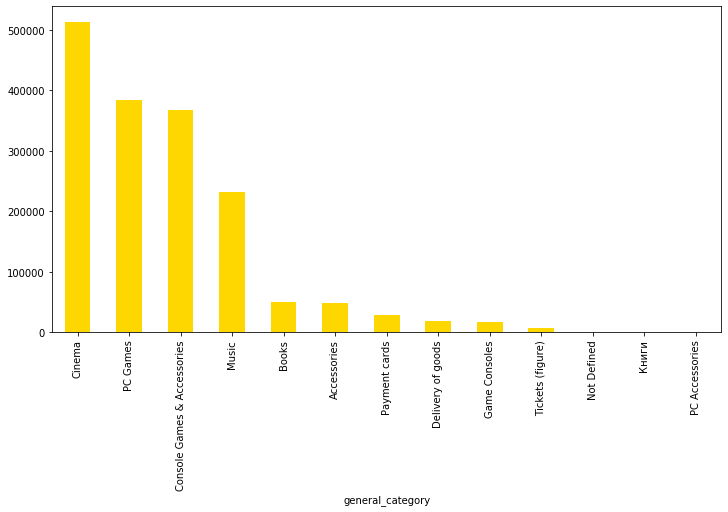

In [127]:
gb3.item_cnt_day.plot(kind = 'bar', color = 'gold', figsize=(12,6))

In [121]:
#From this chart we can determine that Cinema category products are sell the most, way more than anything else. PC Games 
#follow from behind, not far ahead of Console Games & Accessories, then Music. We can observe quite clearly what people 
#like spending their money on in the stores of our Data Frame.

In [122]:
gb3_5 = sales.groupby('general_category').sum().sort_values('revenues', ascending = False)

In [123]:
gb3_5

,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_category_id,revenues
general_category,,,,,,,
Console Games & Accessories,4529740.0,5769454.0,1486116246,4.798006e+08,367330.0,6041688.0,6.695421e+08
Game Consoles,205094.0,255147.0,142844282,2.070568e+08,17765.0,173756.0,2.945632e+08
PC Games,3616043.0,5424250.0,1672099474,1.674717e+08,384896.0,8162075.0,2.740986e+08
Cinema,6232171.0,10215750.0,6793554458,1.696341e+08,513374.0,18144506.0,1.921468e+08
Accessories,668798.0,877453.0,308486556,8.467518e+07,48561.0,168247.0,9.523818e+07
Music,3190365.0,4819573.0,2081311237,8.349130e+07,231399.0,12454422.0,8.594376e+07
Payment cards,350825.0,423323.0,129808724,2.932299e+07,28795.0,718210.0,3.985655e+07
Books,722810.0,1054349.0,539171134,1.863879e+07,50514.0,2110377.0,2.127220e+07
Tickets (figure),20849.0,22716.0,9704002,1.491624e+06,6727.0,8400.0,9.862190e+06


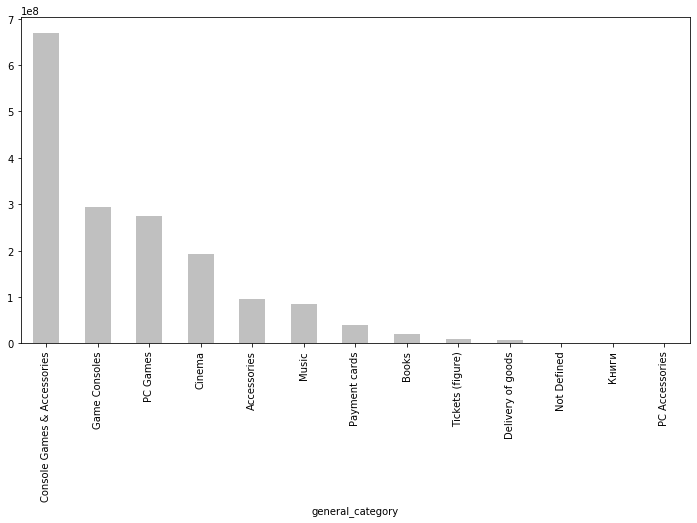

In [126]:
gb3_5.revenues.plot(kind='bar', color = 'silver', figsize=(12,6))

In [128]:
#This chart is similar to the previous ones, but it checks the general categories from a revenue viewpoint. We can see, that
#despite how Cinema category is leading way ahead in items sold per day, it does not generate even half as much revenue as
#products from the Console Games & Accessories category. This is logical, since Cinema tickets and what-not are fairly cheap
#and can be purchased at practically any time, whilst the gaming categories are much more expensive.

In [136]:
sales.item_price.min()

0.0

In [134]:
sales.item_price.mean()

899.9755931795163

In [135]:
sales.item_price.max()

42990.0

In [137]:
sales.item_price.describe()

count    1.381835e+06
mean     8.999756e+02
std      1.806139e+03
min      0.000000e+00
25%      2.490000e+02
50%      3.990000e+02
75%      9.490000e+02
max      4.299000e+04
Name: item_price, dtype: float64

In [142]:
price_bins = [0, 500, 1000, 10000, 20000, 40000]
price_labels = ['Cheap', 'Pricey', 'Fairy Expensive', 'Expensive', 'Very Expensive']

In [144]:
sales['price_cat'] = pd.cut(x=sales.item_price, bins = price_bins, labels = price_labels)

In [149]:
gb4 = sales.groupby('price_cat').count()

In [154]:
gb4.item_price = np.where((gb4.item_price > 650000), gb4.item_price/2, gb4.item_price) # lowering the biggest column for easier visualization

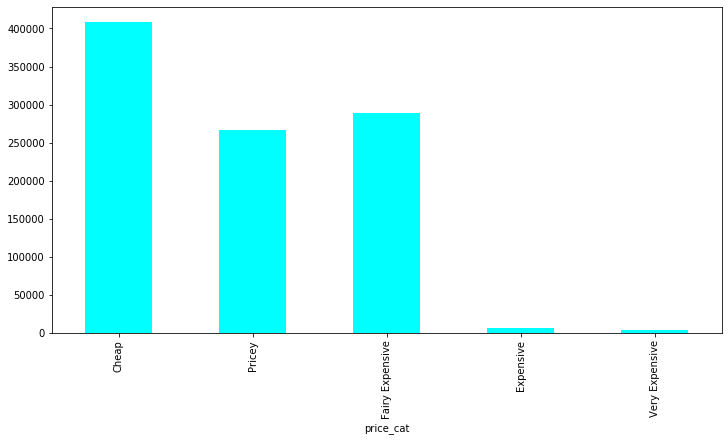

In [155]:
gb4.item_price.plot(kind = 'bar', color = 'aqua', figsize=(12,6), ax = ax)

In [ ]:
#From this chart we can see, that there are far more products in the Cheap category (ranging from 0 to 500 Rubels)
#than anywhere else. 
#Cheap : 0-500, Pricey : 500-1000, Fairly Expensive: 1000-10000, Expensive: 10000-20000, Very Expensive 20000+